In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PART A**

In [ ]:
auto = pd.read_csv("Auto (1).csv")
print(auto.dtypes)

print(auto.head(4))
print(np.unique(auto['horsepower']))
print

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object
    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
['100' '102' '103' '105' '107' '108' '110' '112' '113' '115' '116' '120'
 '122' '125' '129' '130' '132' '133' '135' '137' '138' '139' '140' '142'
 '145' '148' '149' '150' '152' '153' '155' '158' '160

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [ ]:
auto = auto.drop(auto[auto['horsepower']=='?'].index)
auto['horsepower'] = auto['horsepower'].astype(int)
auto['horsepower'].dtype

dtype('int64')

Quantitative vs. Qualitative Predictors

Quantitative

mpg

cylinders

displacement

horsepower

weight

acceleration

year

Qualitative :

origin (1 = American, 2 = European, 3 = Japanese)

name

**PART B**

In [ ]:
quantitative = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'year']

for feature in quantitative:
    print(f"{feature}: min = {auto[feature].min()}, max = {auto[feature].max()}")

mpg: min = 9.0, max = 46.6
cylinders: min = 3, max = 8
displacement: min = 68.0, max = 455.0
horsepower: min = 46, max = 230
weight: min = 1613, max = 5140
acceleration: min = 8.0, max = 24.8
year: min = 70, max = 82


**PART C**

In [ ]:
means = auto[quantitative].mean()
stds = auto[quantitative].std()
print('mean:\n')

print(means)

print('\nstds\n')

print(stds)

mean:

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

stds

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64


**PART D**

In [ ]:
auto_subset = auto.drop(auto.index[9:85])

print('subset ranges \n')

for feature in quantitative:
    print(f"{feature}: min = {auto_subset[feature].min()}, max = {auto_subset[feature].max()}")

subset_means = auto_subset[quantitative].mean()
subset_stds = auto_subset[quantitative].std()

print('subset_means\n')

print(subset_means)

print('\nsubset_stds\n')

print(subset_stds)


subset ranges 

mpg: min = 11.0, max = 46.6
cylinders: min = 3, max = 8
displacement: min = 68.0, max = 455.0
horsepower: min = 46, max = 230
weight: min = 1649, max = 4997
acceleration: min = 8.5, max = 24.8
year: min = 70, max = 82
subset_means

mpg               24.404430
cylinders          5.373418
displacement     187.240506
horsepower       100.721519
weight          2935.971519
acceleration      15.726899
year              77.145570
dtype: float64

subset_stds

mpg               7.867283
cylinders         1.654179
displacement     99.678367
horsepower       35.708853
weight          811.300208
acceleration      2.693721
year              3.106217
dtype: float64


**PART E**

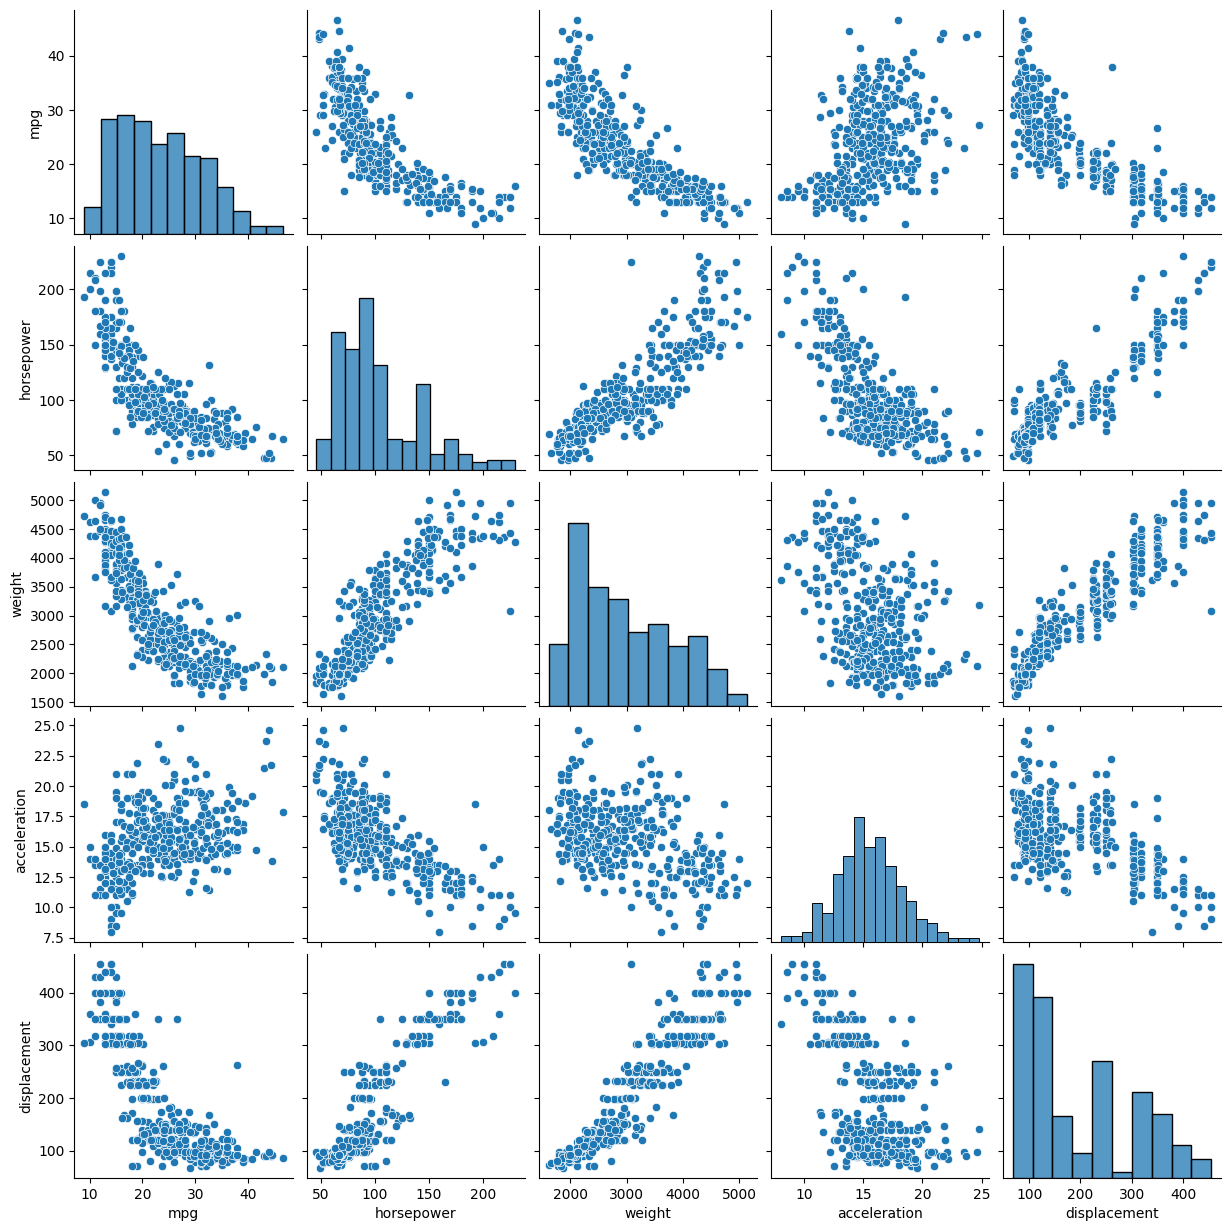

In [ ]:

sns.pairplot(auto[['mpg', 'horsepower', 'weight', 'acceleration', 'displacement']], diag_kind='hist')
plt.show()


Findings:

mpg vs weight: strong negative correlation (heavier cars have lower mpg).

mpg vs horsepower: negative correlation (more powerful cars consume more fuel).

mpg vs displacement: negative correlation (larger engines
 have lower mpg).

mpg vs acceleration: weaker, but sometimes lighter/faster cars have higher mpg.

year vs mpg: strong positive correlation (newer cars have higher mpg due to efficiency improvements).

**PART F**

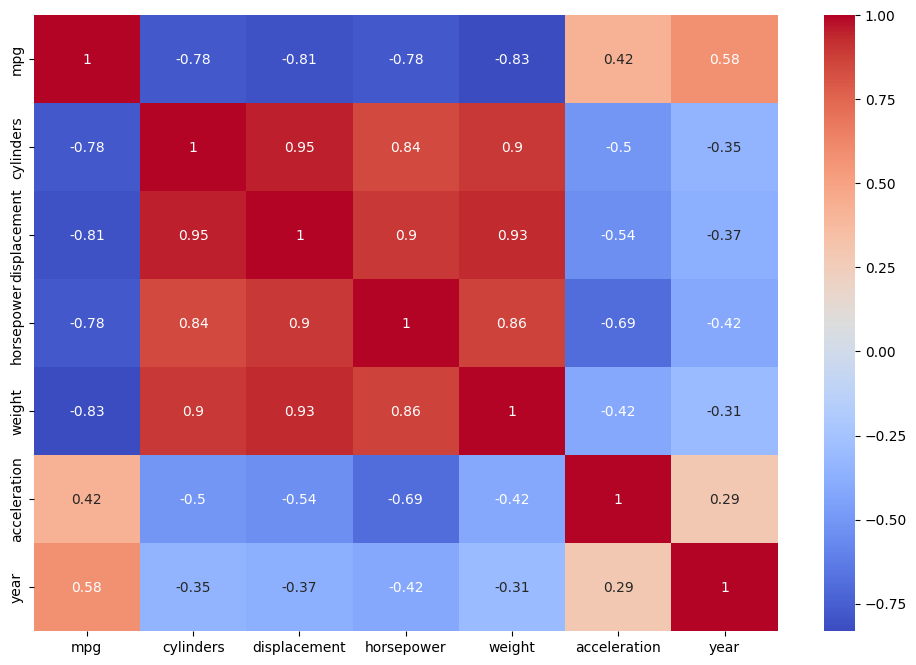

In [ ]:
corr_matrix = auto[quantitative].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Predicting mpg

Yes, several variables are useful:

weight, horsepower, cylinders and displacement show strong negative relationships with mpg.

year shows a positive relationship (newer cars are more fuel efficient).

cylinders (discrete) also helps: cars with more cylinders usually have lower mpg.

So weight, horsepower, displacement, and year are the most promising predictors for gas mileage.